# PROCESOS DE INGESTA Y PREPARACION DE LOS DATOS

In [1]:
# Importar librerías necesarias
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

C:\Users\User\AppData\Local\Temp\ipykernel_31892\3542224405.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# Importar el dataset
df = pd.read_csv('fraud.csv')

In [3]:
# Renombrar las columnas
df.rename(columns={
    'step': 'paso',
    'type': 'tipo',
    'amount': 'monto',
    'oldbalanceOrg': 'saldoAntiguoOrigen',
    'newbalanceOrig': 'saldoNuevoOrigen',
    'oldbalanceDest': 'saldoAntiguoDestino',
    'newbalanceDest': 'saldoNuevoDestino',
    'isFraud': 'esFraude'
}, inplace=True)
# Calcular las métricas necesarias
num_transacciones = len(df)
monto_total = df['monto'].sum()
monto_promedio = df['monto'].mean()
monto_minimo = df['monto'].min()
monto_maximo = df['monto'].max()

# Calcular la cantidad de transacciones fraudulentas y no fraudulentas
num_fraudes = df[df['esFraude'] == 1].shape[0]
num_no_fraudes = df[df['esFraude'] == 0].shape[0]

# PRESENTANDO RESULTADOS

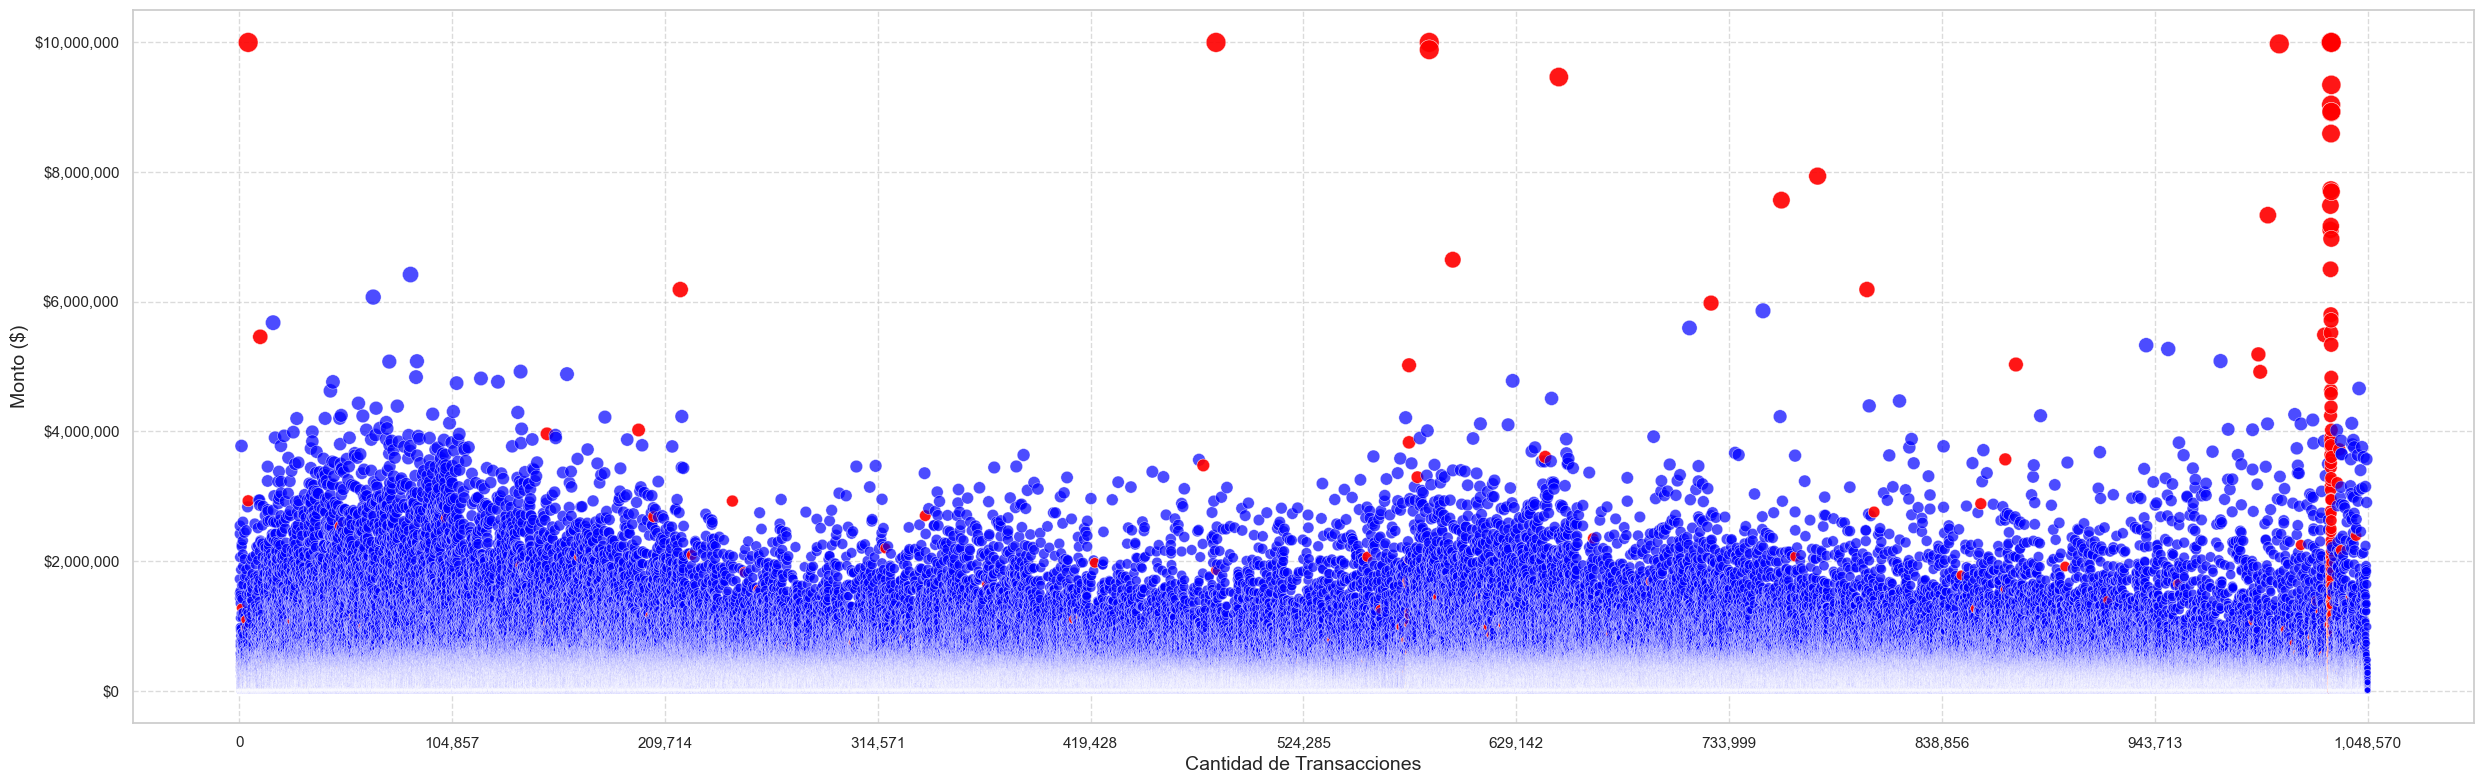

In [4]:


# Crear el HTML dinámicamente
html_content = f'''
<div style="display: flex; flex-wrap: wrap; justify-content: space-around;">
    <div style="background-color: #f9f9f9; border: 1px solid #ddd; border-radius: 8px; padding: 20px; margin: 10px; width: 200px; height: 100px; text-align: center; box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);">
        <h3>Total Transacciones</h3>
        <p style="font-size: 22px; color: #007bff;">{num_transacciones:,.2f}</p>
    </div>
    <div style="background-color: #f9f9f9; border: 1px solid #ddd; border-radius: 8px; padding: 20px; margin: 10px; width: 200px; height: 100px; text-align: center; box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);">
        <h3>Monto Total</h3>
        <p style="font-size: 22px; color: #007bff;">${monto_total:,.2f}</p>
    </div>
    <div style="background-color: #f9f9f9; border: 1px solid #ddd; border-radius: 8px; padding: 20px; margin: 10px; width: 200px; height: 100px; text-align: center; box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);">
        <h3>Monto Promedio</h3>
        <p style="font-size: 22px; color: #007bff;">${monto_promedio:,.2f}</p>
    </div>
    <div style="background-color: #f9f9f9; border: 1px solid #ddd; border-radius: 8px; padding: 20px; margin: 10px; width: 200px; height: 100px; text-align: center; box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);">
        <h3>Monto Mínimo</h3>
        <p style="font-size: 22px; color: #007bff;">${monto_minimo:,.2f}</p>
    </div>
    <div style="background-color: #f9f9f9; border: 1px solid #ddd; border-radius: 8px; padding: 20px; margin: 10px; width: 200px; height: 100px; text-align: center; box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);">
        <h3>Monto Máximo</h3>
        <p style="font-size: 22px; color: #007bff;">${monto_maximo:,.2f}</p>
    </div>
    <div style="background-color: #f9f9f9; border: 1px solid #ddd; border-radius: 8px; padding: 20px; margin: 10px; width: 200px; height: 100px; text-align: center; box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);">
        <h3>Transacciones Fraudulentas</h3>
        <p style="font-size: 22px; color: #dc3545;">{num_fraudes:,.2f}</p>
    </div>
    <div style="background-color: #f9f9f9; border: 1px solid #ddd; border-radius: 8px; padding: 20px; margin: 10px; width: 200px; height: 100px; text-align: center; box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);">
        <h3>Transacciones No Fraudulentas</h3>
        <p style="font-size: 22px; color: #28a745;">{num_no_fraudes:,.2f}</p>
    </div>
</div>
'''

# Mostrar las tarjetas en Jupyter Notebook
display(HTML(html_content))
#-------------------------------



# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el diccionario de colores para 'esFraude'
palette_colors = {0: 'blue', 1: 'red'}

# Contar las transacciones y crear una nueva columna
df['transaccion'] = range(1, len(df) + 1)  # Suponiendo que cada fila es una transacción

# Gráfico de dispersión mejorado
plt.figure(figsize=(25, 8))
scatter = sns.scatterplot(
    x='transaccion', 
    y='monto', 
    hue='esFraude', 
    data=df, 
    palette=palette_colors, 
    alpha=0.7, 
    size='monto', 
    sizes=(20, 200)
)

# Formatear el eje Y para mostrar valores en dólares
scatter.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

# Formatear el eje X para mostrar valores legibles
scatter.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))  # Formato de miles

# Establecer el rango de ticks del eje X para que sea más claro
plt.xticks(range(0, len(df) + 1, max(1, len(df) // 10)))  # Muestra hasta 10 ticks en el eje X

# Mejorar el estilo del gráfico
plt.xlabel('Cantidad de Transacciones', fontsize=14)
plt.ylabel('Monto ($)', fontsize=14)

# Eliminar la leyenda
scatter.legend_.remove()

# Mejorar el diseño y estilo del gráfico
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()